<a href="https://colab.research.google.com/github/bountyhunter12/ML/blob/main/logisticRegression_GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

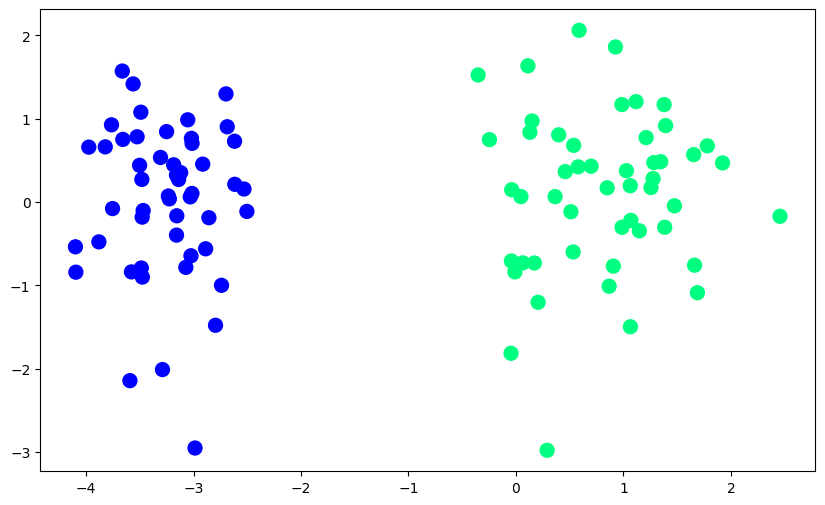

In [273]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [274]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none', solver='sag')
lor.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [275]:
print(lor.coef_)
print(lor.intercept_)

[[4.89956618 0.23690335]]
[5.84426849]


In [276]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [277]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m1*x_input1 +b1

In [278]:
def gd(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5

    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])

    return weights[0],weights[1:]


In [279]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [280]:
intercept_,coef_ = gd(X,y)

In [281]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [282]:
X_input = np.linspace(-3,3,100)
y_input = m*X_input + b

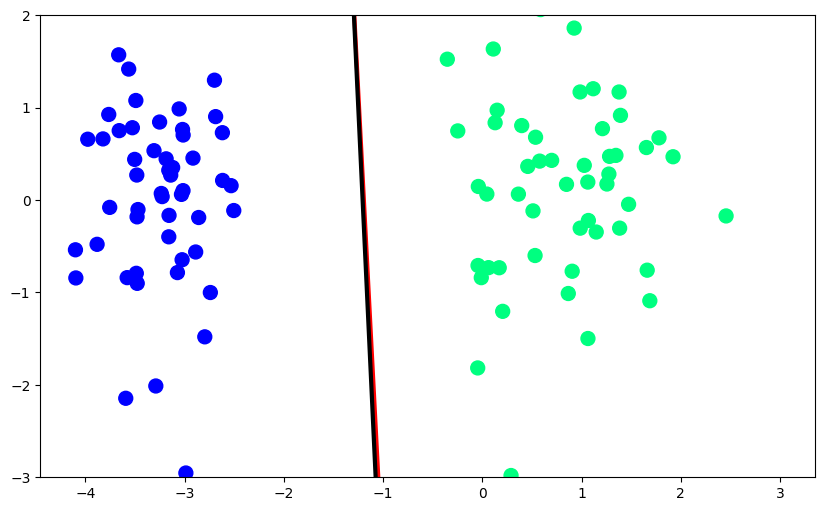

In [283]:
plt.figure(figsize=(10,6))
plt.plot(x_input1,y_input1,color='red',linewidth=3)
plt.plot(X_input,y_input,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.show()